In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

20

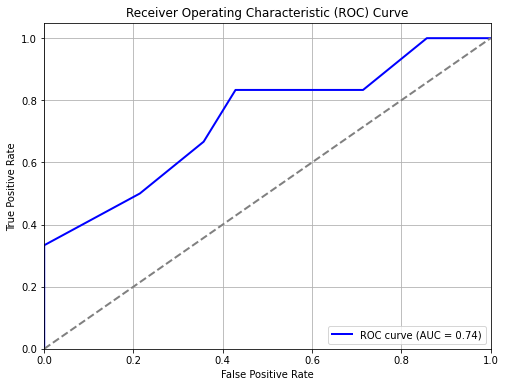

0.7380952380952381

In [ ]:
truth_to_pred = [
    (0, 0.1),
    (0, 0.1),
    (0, 0.2),
    (0, 0.2),
    (1, 0.2),
    (0, 0.3),
    (0, 0.3),
    (0, 0.3),
    (0, 0.4),
    (1, 0.5),
    (0, 0.5),    
    (0, 0.6),
    (1, 0.6), 
    (0, 0.6),
    (0, 0.7),
    (1, 0.7),
    (0, 0.7),
    (0, 0.7),
    (1, 0.8),
    (1, 0.9),
]

ground_truth  = [data[0] for data in truth_to_pred]
model_score = [data[1] for data in truth_to_pred]

# Compute ROC curve
fpr, tpr, _ = roc_curve(ground_truth, model_score, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Output AUC value
roc_auc

Inbalance Dataset

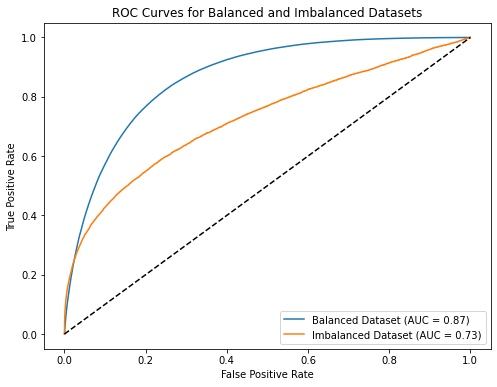

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

# Function to generate dataset, train model, and plot ROC
def generate_and_plot_roc(n_samples, weights, title):
    # Generate synthetic dataset
    X, y = make_classification(n_samples=n_samples, n_features=20, 
                               n_informative=5, n_redundant=2, 
                               weights=weights, random_state=42)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')

# Plot both cases
plt.figure(figsize=(8, 6))
generate_and_plot_roc(n_samples=2_000_000, weights=[0.5, 0.5], title="Balanced Dataset")
generate_and_plot_roc(n_samples=2_000_000, weights=[0.99, 0.01], title="Imbalanced Dataset")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Balanced and Imbalanced Datasets')
plt.legend()
plt.show()
